# Exercice 1 - Digit classification system using different SVM classifiers

## Imports

In [36]:
import gzip
import _pickle as cPickle

# Add your imports here
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.svm import SVC
from sklearn import metrics

## Exercise's steps

The objective of this exercise is to build a classification system able to classify the images of handwritten digits (0–9) coming from the MNIST database and using SVM with different types of kernels (linear, polynomial, RBF, ...). For that purpose, you will use the SVM library available in [_Scikit-learn_](http://scikit-learn.org).

### a. Getting the training and test sample sets from the MNIST database

#### a) Load MNIST digit dataset

In [37]:
# Load training, validation (not used in the PW) and test datasets
with gzip.open("mnist.pkl.gz", "rb") as f:
    train_set, _valid_set, test_set = cPickle.load(f, encoding="latin1")

# Print the shape of the various datasets
print("Training set:", train_set[0].shape)
#print("Validation set:", valid_set[0].shape)
print("Test set:", test_set[0].shape)

Training set: (50000, 784)
Test set: (10000, 784)


#### b) Visualize (plot) the images of some digits of the MNIST database

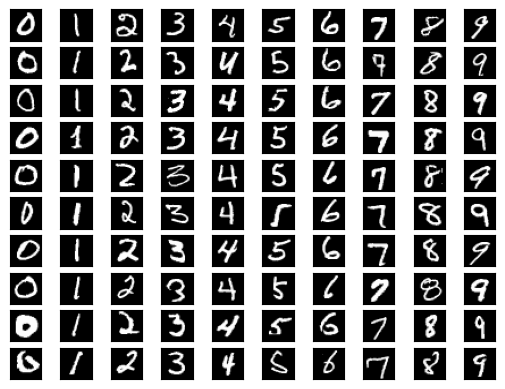

In [38]:
samples_per_class = 10
_, ax = plt.subplots(samples_per_class,10)

found = np.zeros(10, dtype=np.uint8)

while np.any(found < samples_per_class):
    idx = randint(0, train_set[0].shape[0])
    c = train_set[1][idx]
    if found[c] >= samples_per_class: continue
    ax[found[c], c].imshow(train_set[0][idx].reshape(28,28), cmap='gray')
    ax[found[c], c].set_xticks([])
    ax[found[c], c].set_yticks([])
    found[c] += 1
    
plt.show()

#### c) Build the final training and test sets, which should be balanced

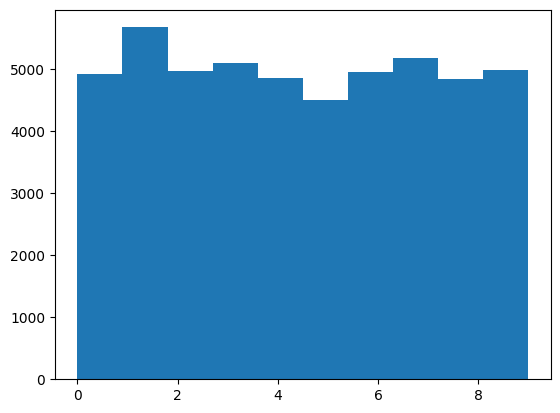

In [39]:
# plot the histogram of the labels
plt.hist(train_set[1], bins=10)
plt.show()

From the histogram above we can estimate that the dataset is balanced, therefor there is no need for additional balancing process. 

After a long incomprehension, we realized that we needed to reduced the size of the dataset to 200 samples for the training and 100 for the test.

In [40]:
# keep only 200 samples in train_set, those samples needs to be balanced
train_set_balanced = [[], []]
for i in range(10):
    train_set_balanced[0].extend(train_set[0][train_set[1] == i][:20])
    train_set_balanced[1].extend(train_set[1][train_set[1] == i][:20])

In [41]:
# keep only 100 samples in test_set, those samples needs to be balanced
test_set_balanced = [[], []]
for i in range(10):
    test_set_balanced[0].extend(test_set[0][test_set[1] == i][:10])
    test_set_balanced[1].extend(test_set[1][test_set[1] == i][:10])

### b. Classification of digits based on raw pixel values using SVM and different kernels

Create, train and test several SVM classifiers with different kernels (linear, polynomial, RBF, ...). For the training, perform a cross-validation using 10 folds, and test different with several $C$ and kernel parameter values (e.g. for $\gamma$ for RBF kernel) in order to get the best classifier. After the test, display the classification performances and confusion matrix of each SVM classifier (see class _metrics_).

In [42]:
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly', degree=2)
svm_rbf = SVC(kernel='rbf', gamma='auto')
svm_sigmoid = SVC(kernel='sigmoid')

svms = [svm_linear, svm_poly, svm_rbf, svm_sigmoid]

In [43]:
X_train, y_train = train_set_balanced[0], train_set_balanced[1]

In [44]:
# for each svm in svms, train and evaluate with cross-validation 10 folds
from sklearn.model_selection import cross_val_score
svm_scores = []

for svm in svms:
   scores = cross_val_score(svm, X_train, y_train, cv=10, n_jobs=-1)
   print(scores)
   svm_scores.append(scores)

[0.9  0.85 0.85 0.75 0.8  1.   0.95 0.9  0.8  0.9 ]
[0.85 0.8  0.65 0.8  0.85 0.95 0.85 0.8  0.75 0.85]
[0.85 0.65 0.65 0.6  0.7  0.85 0.8  0.8  0.75 0.75]
[0.95 0.7  0.85 0.7  0.75 0.95 0.85 0.8  0.8  0.9 ]


In [45]:
# print the mean and standard deviation of the scores
for i in range(len(svms)):
   print("model: ", svms[i].kernel, " mean: ", svm_scores[i].mean(), " std: ", svm_scores[i].std())

model:  linear  mean:  0.8699999999999999  std:  0.0714142842854285
model:  poly  mean:  0.8150000000000001  std:  0.0743303437365925
model:  rbf  mean:  0.74  std:  0.08306623862918075
model:  sigmoid  mean:  0.8249999999999998  std:  0.0873212459828649


### c. (Optional) Impact of preprocessing and feature extraction

Analyse the impact of the classification performances using the following preprocessing and feature extraction steps:

#### a) Preprocessing step: convert images to binary (i.e. black and white) representations 

In [46]:
# convert each value in X that is not 0. to 1
train_binary = train_set_balanced.copy()
for i in range(len(train_binary[0])):
   train_binary[0][i] = np.where(train_binary[0][i] != 0., 1., 0.)

#### b) Feature extraction steps:
* Horizontal and vertical projections (i.e. compute the sum of grey pixel values along the the X and Y-axis)
* Local binary patterns
* Any other usable image features that you may have found

### d. Analysis of the results

Analyse the results obtained with the best SVM classifier.

a) Which kernel and parameters were used?

The kernel used are linear, polynomial, RBF, sigmoid and precomputed. The parameters used are the default ones. Except for the polynomial kernel where we used the degree 2 and for the RBF kernel where we used the gamma auto, which means that the gamma is calculated using 1/n_features. Gamma is the kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

b) Which digit classes are the best/worse recognized against which? Why?

In [48]:
# use the linear model because it is the best model found in the previous step
pred = svm_linear.fit(train_binary[0], train_binary[1]).predict(test_set_balanced[0])
print("Accuracy:", metrics.accuracy_score(test_set_balanced[1], pred))

Accuracy: 0.71


[[ 8  0  1  0  0  0  0  0  0  1]
 [ 0 10  0  0  0  0  0  0  0  0]
 [ 0  2  6  0  0  1  0  1  0  0]
 [ 0  0  2  6  0  2  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  1  1  1  1  6  0  0  0  0]
 [ 0  1  3  0  0  1  5  0  0  0]
 [ 0  0  0  0  1  0  0  9  0  0]
 [ 0  0  0  0  0  3  0  0  7  0]
 [ 0  1  0  0  3  0  0  2  0  4]]


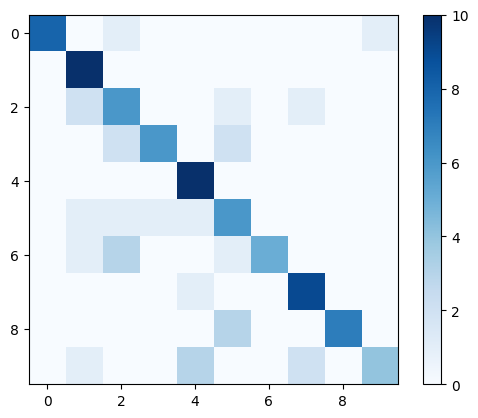

In [49]:
# compute the confusion matrix
cm = metrics.confusion_matrix(test_set_balanced[1], pred)
print(cm)

# plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

The best recognized digit is 2 and 5. The worst recognized digit is 9. The reason is that it's often confused with 5 and 7.

c) What is the impact of the sizes of the training and test sets on the classification performance?

The impact of the size of the training and test sets on the classification performance is that the more we have data, the more the model will have a perception of various cases and will be able to generalize better. Therefor if the data are pertinents, the model will have a better accuracy. If we trained the model on more data but the data are redundant, the model will have a risk of overfitting. 
Augmenting the size of the test set allow us to test more different cases and therefor have more confidence in the accuracy of the model.